## Clustering

In [7]:
import numpy as np
from matplotlib import pyplot as plt

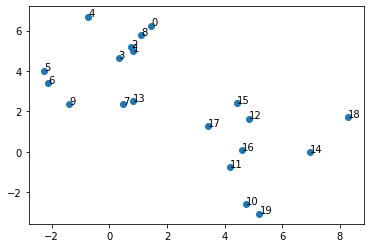

In [47]:
# Let us first generate some data (from two distinct normal distributions) 

a = np.random.multivariate_normal([0, 5], [[2, 1], [1, 3]], size=10)
b = np.random.multivariate_normal([5, 0], [[3, 1], [1, 4]], size=10)

X = np.concatenate((a,b))
plt.scatter(X[:,0], X[:,1])

# Let us include the indexes in the plot to see whether
# a point belongs to the first (index 0-9) or second cluster (index 10-19)

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(i))

### K-Means Clustering

In [37]:
from sklearn.cluster import KMeans

In [48]:
# Let us assume that we know that we are looking for two clusters

km = KMeans(n_clusters=2)

# Now let's find the clusters

km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

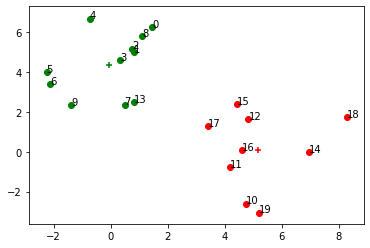

In [57]:
# Let us indicate each cluster center with a plus sign

plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],color="r",marker="+")
plt.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],color="g",marker="+")

# Let us color the datapoints depending on what cluster (label 0 or 1) they belong to

plt.scatter(X[km.labels_==0,0], X[km.labels_==0,1],color="r")
plt.scatter(X[km.labels_==1,0], X[km.labels_==1,1],color="g")

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(i))

# Do you find any "misplaced" datapoints?

### Gaussian Mixture Models

In [58]:
from sklearn.mixture import GaussianMixture

In [70]:
# Again, we assume that we know that we are looking for two clusters

gm = GaussianMixture(n_components=2)

# Now let's find the clusters

gm.fit(X)

print("Cluster weights: {}".format(gm.weights_))

# We will also need the labels, i.e., what cluster each datapoint (mostly) belongs to

gm_labels = gm.predict(X)

Cluster weights: [0.45039029 0.54960971]


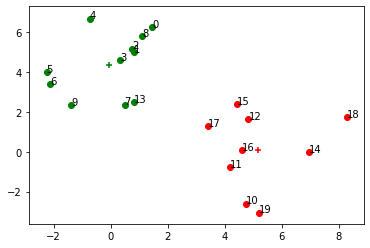

In [71]:
# Let us indicate each cluster center with a plus sign

plt.scatter(gm.means_[0,0],gm.means_[0,1],color="r",marker="+")
plt.scatter(gm.means_[1,0],gm.means_[1,1],color="g",marker="+")

# Let us color the datapoints depending on what cluster (label 0 or 1) they belong to

plt.scatter(X[gm_labels==0,0], X[gm_labels==0,1],color="r")
plt.scatter(X[gm_labels==1,0], X[gm_labels==1,1],color="g")

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(i))

### Hierarchical clustering

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

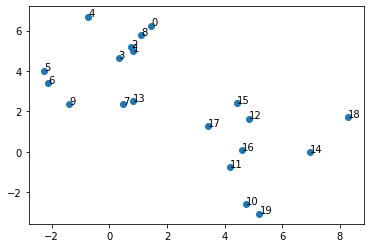

In [53]:
# Comment out the data generation below, if we want to compare to the above

# a = np.random.multivariate_normal([0, 5], [[2, 1], [1, 3]], size=10)
# b = np.random.multivariate_normal([5, 0], [[3, 1], [1, 4]], size=10)
# X = np.concatenate((a,b))

plt.scatter(X[:,0], X[:,1])
for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(i))
plt.show()

In [51]:
Z = linkage(X,"ward")
Z

array([[ 1.        ,  2.        ,  0.18870981,  2.        ],
       [ 7.        , 13.        ,  0.35256855,  2.        ],
       [ 0.        ,  8.        ,  0.57378815,  2.        ],
       [ 5.        ,  6.        ,  0.64887293,  2.        ],
       [10.        , 19.        ,  0.65484607,  2.        ],
       [ 3.        , 20.        ,  0.76166653,  3.        ],
       [12.        , 15.        ,  0.86088167,  2.        ],
       [11.        , 16.        ,  0.97340647,  2.        ],
       [17.        , 26.        ,  1.64320655,  3.        ],
       [ 9.        , 23.        ,  1.82430699,  3.        ],
       [22.        , 25.        ,  1.95415423,  5.        ],
       [14.        , 18.        ,  2.18720641,  2.        ],
       [ 4.        , 30.        ,  2.69551383,  6.        ],
       [27.        , 28.        ,  3.2797756 ,  5.        ],
       [21.        , 29.        ,  4.18230174,  5.        ],
       [31.        , 33.        ,  5.63373715,  7.        ],
       [24.        , 35.

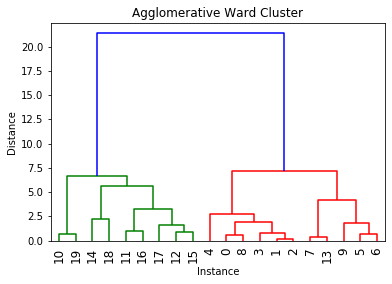

In [52]:
plt.title('Agglomerative Ward Cluster')
plt.xlabel('Instance')
plt.ylabel('Distance')
d = dendrogram(Z,leaf_rotation=90)